# Овошје

Целта на оваа лабораториска вежба е да се запознаете со процедурата за тренирање и тестирање на способноста на алгоритам од областа на машинското учење. Примерот е за дрва за одлучување, користејќи ја библиотеката [scikit-learn](https://scikit-learn.org/stable/index.html).

Разгледуваме множество податоци за овошје и зеленчук. Целта е да умееме да разликуваме овошје од зеленчук имајќи го предвид хранливиот состав на производот. Податоците со кои располагаме се дадени во табелата подолу.

In [103]:
import pandas as pd

In [104]:
df = pd.read_csv('Data/fruits_train.csv')
df

,vitamin A %,vitamin C %,calcium %,iron %,magnesium %,calories (per 100g),potassium (mg),protein (g),fiber (g),classification
0,1.0,7.0,0.0,0.0,1.0,52.0,107.0,0.3,2.4,fruit
1,38.0,16.0,1.0,2.0,2.0,48.0,259.0,1.4,2.0,fruit
2,2.0,16.0,1.0,3.0,7.0,160.0,485.0,2.0,7.0,fruit
3,1.0,14.0,0.0,1.0,6.0,89.0,358.0,1.1,2.6,fruit
4,0.0,8.0,1.0,1.0,5.0,43.0,325.0,1.6,2.8,vegetable
5,4.0,35.0,2.0,3.0,5.0,43.0,163.0,1.4,5.0,fruit
6,1.0,16.0,0.0,1.0,1.0,57.0,77.0,0.7,2.4,fruit
7,12.0,148.0,4.0,3.0,5.0,34.0,316.0,2.8,2.6,vegetable
8,15.0,141.0,4.0,7.0,5.0,43.0,389.0,3.4,3.8,vegetable
9,334.0,9.0,3.0,1.0,3.0,41.0,320.0,0.9,2.8,vegetable


Поделете го податочното множество на два дела. Поголемиот дел нека е 70% и ќе служи за тренирање, а помалиот дел од 30% ќе служи за проверка на повединието на алгоритмите кои ќе ги имплементирате понатаму.

In [105]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
#df['classification'] = labelencoder.fit_transform(df['classification'])
df_x = df.iloc[:,:-1]
df_y = df['classification']
df

,vitamin A %,vitamin C %,calcium %,iron %,magnesium %,calories (per 100g),potassium (mg),protein (g),fiber (g),classification
0,1.0,7.0,0.0,0.0,1.0,52.0,107.0,0.3,2.4,fruit
1,38.0,16.0,1.0,2.0,2.0,48.0,259.0,1.4,2.0,fruit
2,2.0,16.0,1.0,3.0,7.0,160.0,485.0,2.0,7.0,fruit
3,1.0,14.0,0.0,1.0,6.0,89.0,358.0,1.1,2.6,fruit
4,0.0,8.0,1.0,1.0,5.0,43.0,325.0,1.6,2.8,vegetable
5,4.0,35.0,2.0,3.0,5.0,43.0,163.0,1.4,5.0,fruit
6,1.0,16.0,0.0,1.0,1.0,57.0,77.0,0.7,2.4,fruit
7,12.0,148.0,4.0,3.0,5.0,34.0,316.0,2.8,2.6,vegetable
8,15.0,141.0,4.0,7.0,5.0,43.0,389.0,3.4,3.8,vegetable
9,334.0,9.0,3.0,1.0,3.0,41.0,320.0,0.9,2.8,vegetable


In [106]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.3, random_state = 155)

Исцртајте ги на график производите така што на x и y оските ќе бидат податоците за витамините, а производите ќе бидат претставени со боја или симбол.

**Совет**: За помош може да го искористите третиот пример `Setting size and color with column names` од [документацијата](https://plotly.com/python/line-and-scatter/) на плотли.

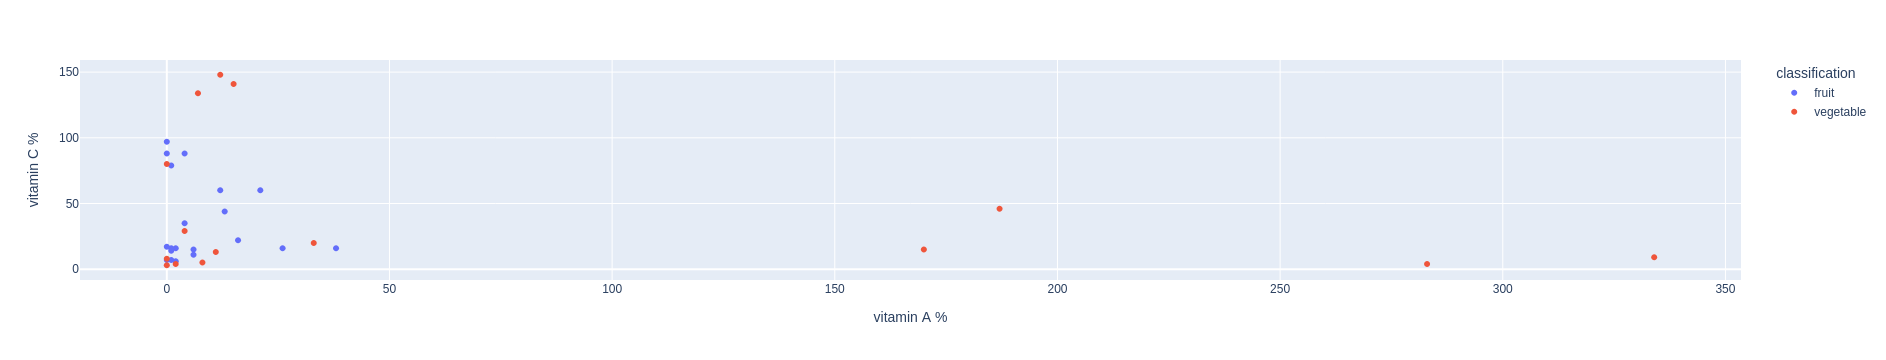

In [107]:
import plotly.express as px
px.scatter(df, x='vitamin A %', y='vitamin C %', color='classification')

Користејќи ја библиотеката `sklearn`,  вчитајте класификатор - дрво за одлучување, претставен преку класата `DecisionTreeClassifier`, а потоа вметнете ги податоците за тренирање од вториот чекор за да ја истренирате мрежата.

- [Пример за дрва за одлучување од sklearn](https://scikit-learn.org/stable/modules/tree.html)
- [Документација за Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [108]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy')

In [109]:
from sklearn.naive_bayes import MultinomialNB

clf_b = MultinomialNB()

In [110]:
from sklearn.neural_network import MLPClassifier

clf_n = MLPClassifier()

In [111]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [112]:
clf_b.fit(x_train, y_train)

MultinomialNB()

Пресметајте ја прецизноста на алгоритамот за податоците кои тој ги нема видено (на кои нема тренирано). Потоа пресметајте ја прецизноста на алгоритамот за податоците кои ги има видено (на кои има тренирано). Споредете ги резултатите. Ви изгледаат ли во ред?

In [113]:
y_pred = clf.predict(x_test)

from sklearn.metrics import accuracy_score
print('tocnost', accuracy_score(y_test, y_pred))

tocnost 0.6363636363636364


In [114]:
a1 = accuracy_score(y_train, clf.predict(x_train))
print('tocnost drvo ', a1)

tocnost drvo  1.0


In [115]:
y_pred_b = clf_b.predict(x_test)
print('tocnost naiven', accuracy_score(y_test, y_pred_b))

tocnost naiven 0.7272727272727273


Кои производи алгоритамот успева да ги распознава подобро, висококалоричните (над 50 калории) или нискокалоричните (под 50 калории)?

In [116]:
df_x_high_calorie = x_test[df['calories (per 100g)'] > 50]  
df_x_low_calorie = x_test[df['calories (per 100g)'] <= 50]
df_x_high_calorie

/tmp/ipykernel_403/3637871123.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_403/3637871123.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,vitamin A %,vitamin C %,calcium %,iron %,magnesium %,calories (per 100g),potassium (mg),protein (g),fiber (g)
31,13.0,44.0,3.0,1.0,3.0,53.0,166.0,0.8,1.8
0,1.0,7.0,0.0,0.0,1.0,52.0,107.0,0.3,2.4
17,33.0,20.0,5.0,11.0,7.0,61.0,180.0,1.5,1.8
2,2.0,16.0,1.0,3.0,7.0,160.0,485.0,2.0,7.0
16,2.0,6.0,1.0,1.0,1.0,67.0,191.0,0.6,0.9


In [117]:
df_y_high_calorie = y_test[x_test['calories (per 100g)'] > 50]
df_y_low_calorie = y_test[x_test['calories (per 100g)'] <= 50]
df_y_low_calorie

27    vegetable
18        fruit
28    vegetable
29        fruit
14    vegetable
7     vegetable
Name: classification, dtype: object

In [118]:
accuracy_score(df_y_high_calorie, clf.predict(df_x_high_calorie))

0.8

In [119]:
accuracy_score(df_y_low_calorie, clf.predict(df_x_low_calorie))

0.5

Какви производи се редовите од податочното множество од датотеката `fruits_test.csv`?